In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load the cleaned dataset
df = pd.read_csv("k12_school_shootings_merged_clean.csv")

# Quick peek
print("Rows, columns:", df.shape)
df.head()


Rows, columns: (3136, 78)


,Incident_ID,Month,Day,Year,Date,School,Victims_Killed,Victims_Wounded,Number_Victims,Shooter_Killed,...,Victim_Row_Count,Victim_Fatalities_fromVictimTable,Victim_Wounded_fromVictimTable,Student_Victims,Staff_Victims,Num_Weapons,Weapon_Types_List,Has_Rifle,Has_Shotgun,Has_Handgun
0,20250827MNANM,8,27,2025,2025-08-27,Annunciation Catholic School,2,17,19,1,...,19.0,2.0,17.0,16.0,0.0,3.0,"Rifle, Shotgun, Handgun",True,True,True
1,20250826MNCRM,8,26,2025,2025-08-26,Cristo Rey Jesuit High School,1,6,7,0,...,7.0,1.0,6.0,0.0,0.0,1.0,Rifle,True,False,False
2,20250822ILMAP,8,22,2025,2025-08-22,Manual High School,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,1.0,Handgun,False,False,True
3,20250822KYMAM,8,22,2025,2025-08-22,Mayfield High School,0,1,1,0,...,1.0,0.0,1.0,0.0,0.0,1.0,Handgun,False,False,True
4,20250820TNRIM,8,20,2025,2025-08-20,Riverview Middle School,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,1.0,Handgun,False,False,True


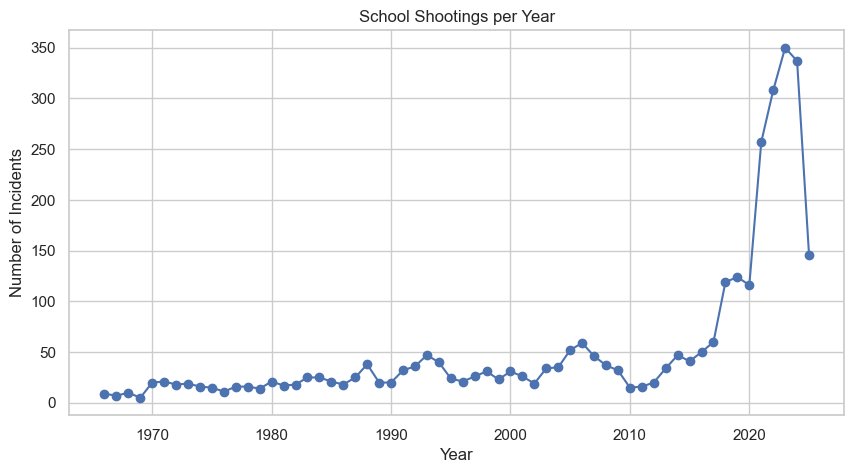

In [2]:
# Count incidents per year
annual_counts = df.groupby("Year").size()

plt.figure(figsize=(10,5))
plt.plot(annual_counts.index, annual_counts.values, marker="o")
plt.title("School Shootings per Year")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.show()



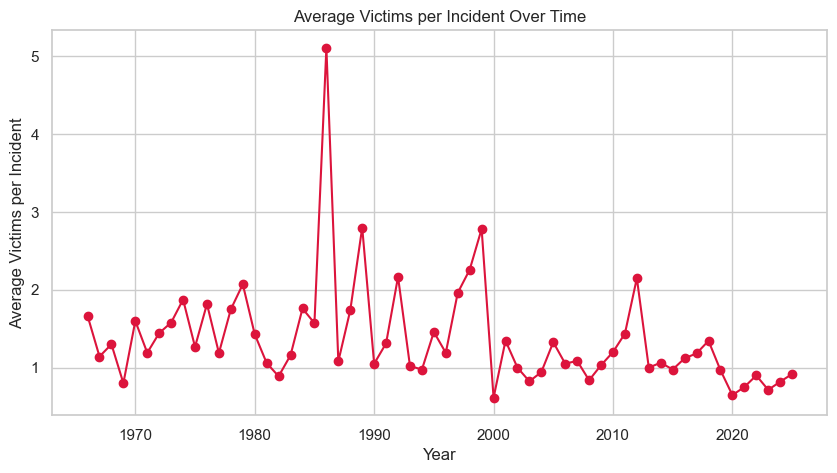

In [3]:
annual_severity = df.groupby("Year")["Number_Victims"].mean()

plt.figure(figsize=(10,5))
plt.plot(annual_severity.index, annual_severity.values, color="crimson", marker="o")
plt.title("Average Victims per Incident Over Time")
plt.xlabel("Year")
plt.ylabel("Average Victims per Incident")
plt.show()


/var/folders/zp/gkttxy354ln6ww21tmw2srvw0000gn/T/ipykernel_15643/3517567195.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weapon_counts.values, y=weapon_counts.index, palette="muted")


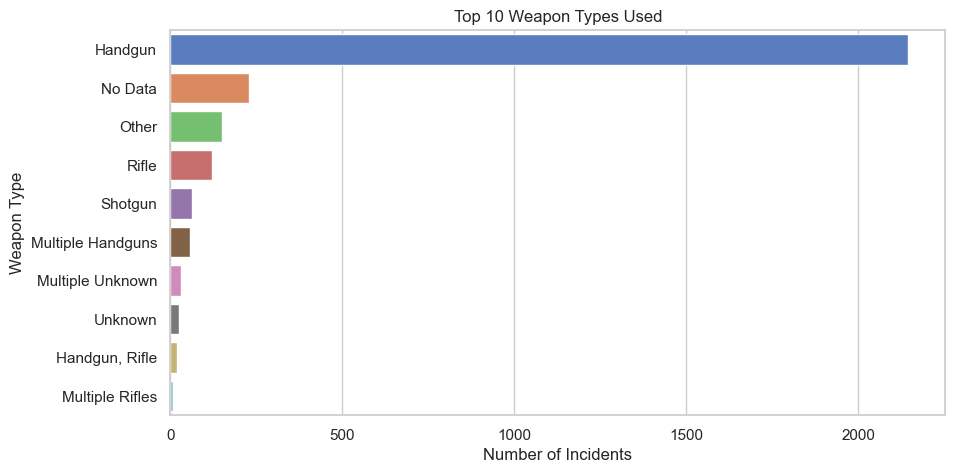

In [4]:
weapon_counts = df["Weapon_Types_List"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=weapon_counts.values, y=weapon_counts.index, palette="muted")
plt.title("Top 10 Weapon Types Used")
plt.xlabel("Number of Incidents")
plt.ylabel("Weapon Type")
plt.show()